In [14]:
import string
from collections import Counter

import matplotlib.pyplot as plt

In [15]:

def get_tweets():
    import GetOldTweets3 as got   # library used to scrape data from twitter without any other tools
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('#corona') \
        .setSince("2020-06-20") \
        .setUntil("2020-06-30") \
        .setMaxTweets(100)
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    # Creating list of chosen tweet data
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [16]:

# reading text file
text = ""
text_tweets = get_tweets()

length = len(text_tweets)

for i in range(0, length):
    text = text_tweets[i][0] + " " + text

# converting to lowercase
lower_case = text.lower()

# Removing punctuations
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# splitting text into words
tokenized_words = cleaned_text.split()

In [17]:
# Print texts
text_tweets

[['[416] #Maastricht Euh....HOEVEEL #mondkapjes (#Geschikt het #OV) wil je hebben ? Hier zijn ALLE #beschikbare mondkapjes. :-) (#Covid-19 #Corona) https://bit.ly/OVMondkapjes247'],
 ['Kit 3 peças R$80,00 Pronta entrega 6 e 18 meses 98860 0206 #dindasdindom #jacarepagua #riodejaneiro #modainfantil #infantil #ficaemcasa #emcasa #corona #covid #entregamosparatodobrasil #importados… https://www.instagram.com/p/CCCc61Dhy3M/?igshid=h9n4o8adb8ai'],
 ['#MemoirProject,Ch8(USA Update) #CORONA #CoronaStayHomePuzzles #PuzzlesCoronaStayHome #MyWife #MyDaughter,Second'],
 ['Uh...was this supposed to be encouraging? Cause, yeah, you dropped the ball on that one. \u2066@CDCgov\u2069 \u2066@CDC_eHealth\u2069 \u2066@CDCFlu\u2069 \u2066@CDCGlobal #COVID19 #Corona '],
 ['We’re about to enter the second half of 2020... #maytheoddsbeeverinyourfavor #HungerGames #balladofsongbirdsandsnakes #COVID19 #coronavirus #corona #MurderHornets #secondwave #electionyear #lockdownextension #catchingfire #mockingjay'],


In [18]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

# Removing stop words from the tokenized words list
final_words = [word for word in tokenized_words if word not in stop_words]

In [19]:
# Get emotions text
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)

        
w = Counter(emotion_list)
print(w,len(emotion_list) )



Counter({' fearful': 2, ' happy': 1, ' obsessed': 1, ' sad': 1, ' independent': 1}) 6


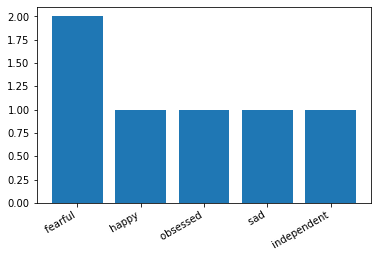

In [20]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()

In [33]:
from sklearn.feature_extraction.text import CountVectorizer 

from nltk.corpus import stopwords
import pandas as pd

stop_words = stopwords.words('english')


vect1 = CountVectorizer(stop_words=stop_words)
print (vect1)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [34]:
#creating bag of words
vect1.fit_transform(tokenized_words)
print("bag of words :",vect1.get_feature_names())
print("vocab        :",vect1.vocabulary_)

bag of words : ['014337', '0206', '0698852', '100', '10395568', '10395640', '10400208', '11', '112', '12', '125000american', '16319014737', '16yo', '16点', '17200ml', '17218', '177770', '18', '195042', '1995', '2019', '2020', '20200629', '20200630', '20yo', '2305010000gmt', '24441', '25', '29', '29062020', '30', '300', '319', '407', '410', '416', '45', '507411', '507416', '507494', '5646130', '5646431', '6week', '85', '8976', '90s', '955308725', '9618', '985', '98860', 'aan', 'abd', 'abdde', 'aboard', 'abortion', 'abschwächen', 'abstandhalten', 'abwasserprobe', 'abzulenken', 'ach', 'act', 'action', 'actions', 'actually', 'administration', 'advances', 'agora', 'ahliqq', 'ajaypuvvada', 'alfreddraxler', 'alkoholiker', 'alle', 'almadrava', 'als', 'also', 'amanda', 'amazing', 'amazon', 'america', 'amidst', 'amp', 'anfang', 'angustia', 'anhängern', 'animais', 'animals', 'announced', 'ansiedade', 'anti', 'antikroppar', 'antiracism', 'apakah', 'apparently', 'apple', 'applepodcasts', 'apply', 'a